# Perkenalan
- Nama : Muhammad Sanzabi Libianto
- Batch : 11
- Milestone 1 - Phase 1
- Objective : Melakukan prediksi pada dataset dengan target berupa kolom `default_payment_next_month`

## Query pada Google Cloud :



Statment:

Query yang dipakai pada Google Cloud dengan ketentuan mengambil beberapa kolom dan limit sample berupa 11*1995 = 21945.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, auc, RocCurveDisplay, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

Statment:

Mengimpor libary yang akan dipakai pada dataset ini.

# Data Loading

In [2]:
df = pd.read_csv("h8dsft_P1M1_Muhammad-Sanzabi.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Statment:

Melakukan loading data yang sebelumnya telah diambil dari Google Cloud dan melihat info dari dataset.

In [3]:
df.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0


Statment:

Melihat 3 data teratas pada dataset.

In [4]:
df.tail(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Statment:

Melihat 3 data terakhir pada dataset.

# Exploratory Data Analysis (EDA)

In [5]:
df.corr()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
limit_balance,1.000000,0.028560,-0.220874,-0.117909,0.130805,-0.223497,-0.281057,-0.275726,-0.245538,-0.236102,...,0.308918,0.309346,0.306496,0.171902,0.169361,0.242904,0.210302,0.200632,0.224960,-0.161909
sex,0.028560,1.000000,-0.016816,-0.011742,-0.127359,-0.078188,-0.104959,-0.098495,-0.072319,-0.053660,...,-0.033684,-0.032004,-0.035632,0.019311,0.014299,0.019432,-0.001635,-0.019963,-0.002479,-0.021765
education_level,-0.220874,-0.016816,1.000000,-0.135548,0.197189,0.089191,0.099282,0.105426,0.101337,0.096330,...,-0.017839,-0.024139,-0.021942,-0.030440,-0.027683,-0.035931,-0.013496,-0.037795,-0.040558,0.044926
marital_status,-0.117909,-0.011742,-0.135548,1.000000,-0.400617,-0.000231,0.047172,0.037733,0.043507,0.047366,...,-0.028957,-0.028412,-0.015740,-0.017355,-0.006396,-0.019958,-0.017476,-0.000289,-0.008024,-0.025998
age,0.130805,-0.127359,0.197189,-0.400617,1.000000,-0.009070,-0.061002,-0.048808,-0.061540,-0.069756,...,0.050337,0.061422,0.057900,0.016988,0.009628,0.027720,0.058554,0.013403,0.010300,0.016905
pay_0,-0.223497,-0.078188,0.089191,-0.000231,-0.009070,1.000000,0.668640,0.560446,0.519716,0.493273,...,0.187317,0.185056,0.185651,-0.093121,-0.085982,-0.105665,-0.071562,-0.048355,-0.059863,0.356963
pay_2,-0.281057,-0.104959,0.099282,0.047172,-0.061002,0.668640,1.000000,0.765616,0.643265,0.605527,...,0.232091,0.228745,0.229091,-0.098743,-0.066226,-0.075787,-0.046495,-0.026198,-0.050794,0.288813
pay_3,-0.275726,-0.098495,0.105426,0.037733,-0.048808,0.560446,0.765616,1.000000,0.750440,0.676661,...,0.236443,0.236052,0.228902,-0.004377,-0.066426,-0.073095,-0.033320,-0.046254,-0.066192,0.275758
pay_4,-0.245538,-0.072319,0.101337,0.043507,-0.061540,0.519716,0.643265,0.750440,1.000000,0.823226,...,0.249524,0.252534,0.249842,-0.020703,-0.011330,-0.080911,-0.027776,-0.039732,-0.059409,0.255805
pay_5,-0.236102,-0.053660,0.096330,0.047366,-0.069756,0.493273,0.605527,0.676661,0.823226,1.000000,...,0.263476,0.267059,0.257019,-0.014592,-0.000027,0.002544,-0.060026,-0.045322,-0.042375,0.253319


Statment:

Pada table heatmap diatas, dapat terlihat bahwa kolom yang akan mejadi target yaitu kolom *default_payment_next_month*, Memiliki beberapa korelasi yang **sangat rendah** pada beberapa kolom. Kolom *bill_amt_1* hingga *pay_amt_6* memiliki korelasi <0.1 pada kolom target, sehingga saya akan melakukan drop kolom pada kolom-kolom tersebut. `Hal ini bertujuan untuk agar meningkatkan nilai akurasi pada model.`

<AxesSubplot:xlabel='age', ylabel='limit_balance'>

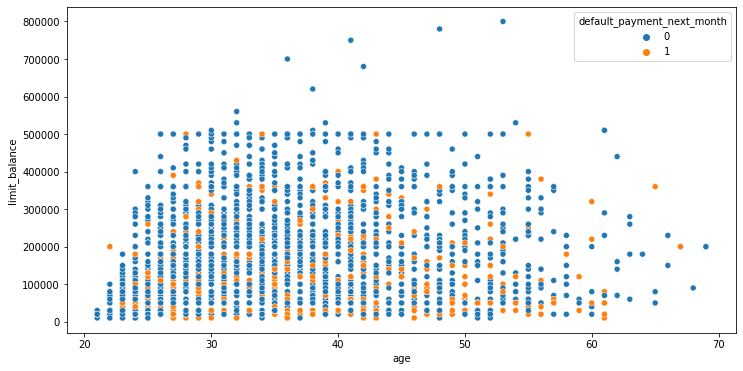

In [6]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="age", y="limit_balance",hue="default_payment_next_month", data=df)

Statment:

Pada diagram diatas, dapat dilihat bahwa dari keseluruhan `populasi yang memiliki limit_balance > 500.000 sebagian besar tidak membayar kredit dibulan berikutnya secara default`. Sedangkan populasi yang memeiliki `limit balance di < 350.000 sebagian besar membayar kredi dibukan berikutnya secara default`.

Kemudian dapat dilihat pula, bahwa `populasi dengan umur diantara 35 - 55 tahun merupakan pemegang kredit dengan limit_balance terbesar dari keseluruhan populasi`.

# Data Preprocessing

## Data Inference

In [7]:
data_inf = df.sample(10, random_state=42)
data_inf.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2882,160000.0,2,1,2,32.0,-1.0,-1.0,-1.0,-1.0,-1,...,3181.0,4998.0,1250.0,5726.0,5037.0,3182.0,5000.0,1252.0,749.0,0
2071,20000.0,1,3,1,29.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2725,150000.0,2,1,2,33.0,0.0,-1.0,-1.0,-1.0,-1,...,1141.0,1067.0,1128.0,237.0,1426.0,1141.0,1067.0,1200.0,1150.0,0


Statment:

Mengambil sample pada dataset berjumlah 10 (Data Inference), yang nanti akan digunakan sebagai data baru untuk melihat hasil prediksi dari model yang telah dibuat.

In [8]:
data_train_set = df.drop(data_inf.index)
data_train_set.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0


Statment:

Menghapus seluruh data inference pada dataset dan selanjutnya membentuk dataset untuk data Training

In [9]:
data_train_set.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf.tail(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
7,40000.0,2,2,1,25.0,0.0,0.0,0.0,0.0,0,...,39380.0,41389.0,40628.0,1950.0,4300.0,2000.0,2938.0,0.0,3700.0,1
8,180000.0,2,2,1,38.0,-1.0,2.0,2.0,-1.0,0,...,8941.0,5181.0,5181.0,0.0,0.0,8941.0,0.0,0.0,0.0,1
9,50000.0,2,1,2,25.0,0.0,0.0,0.0,0.0,0,...,40345.0,31003.0,29693.0,1870.0,2500.0,3017.0,1060.0,1300.0,2000.0,0


Statment: 

 Melakukan reset index pada kedua dataset yang telah terbentuk. Hal ini dilakukan agar pada saat data dimasukkan ke dalam model tidak akan menimbulkan error dikarenakan index yang tidak tersusun.

## Split Dataset (Data Training & Data Testing)

In [10]:
X = data_train_set.drop("default_payment_next_month", axis=1)
y = data_train_set["default_payment_next_month"]
y

0       0
1       0
2       0
3       0
4       0
       ..
2950    0
2951    0
2952    0
2953    1
2954    0
Name: default_payment_next_month, Length: 2955, dtype: int64

Statment:

Melakukan split antara data X (Feature) dan y (target). Pada kasus ini kolom `limit_balance` yang akan menjadi kolom target dari model.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (2364, 23)
Test size:  (591, 23)


Statment:

Pada tahap ini akan dilakukan split data berupa data Training dan data Testing, untuk settingan besaran datanya adalah sebesar 80% Data Training dan 20% untuk Data testing.

## Handling Missing Value

In [12]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Statment:

Pada tahap Handling Missing Value ini tidak akan diakukan, dikarenakan dataset yang digunakan tidak memiliki data Null di semua kolomnya. Sehingga proses ini akan di skip yang selanjutnya akan masuk ke bagian Feature Engineering.

# Feature Engineering

## Handling Outlier

In [13]:
dist_check = X_train.skew(numeric_only=True)

normal_dist = []
skew_dist = []

for i in range(len(dist_check)):
    if dist_check.values[i] < -0.5:
        skew_dist.append(dist_check.index[i])
    elif dist_check.values[i] > 0.5:
        skew_dist.append(dist_check.index[i])
    else:
        normal_dist.append(dist_check.index[i])
        
print('skew_dist :', skew_dist)
print("=================================="*5)

print('normal_dist :',normal_dist)
print("=================================="*5)

skew_dist : ['limit_balance', 'education_level', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
normal_dist : ['sex', 'marital_status']


Statment: 

Pada hasil diatas dapat dilihat bahwa kolom yang memilki distribusi skew pada dataset ini banyak sekali, sedangkan untuk yang normal distribution hanya ada 2 kolom yaitu sex dan marital_status

In [14]:
def detect_skew(df, parameter, fold=1.5):
    
    for i in parameter:
        
        IQR = df[parameter].quantile(0.75) - df[parameter].quantile(0.25)
        upper = df[parameter].quantile(0.75) + (fold*IQR)
        bottom = df[parameter].quantile(0.25) - (fold*IQR)
        
        upper_count = df[
            (df[parameter] > upper)
        ][parameter].count()
        
        bottom_count = df[
            (df[parameter] < bottom)
        ][parameter].count()
        
        total_count = upper_count + bottom_count
        percentage = (total_count/len(df[parameter])*100).round(2)
        
        a = ({'Column':parameter, 'Total Outliers':total_count, 'Percentage':percentage})
    return print(a)

for i in skew_dist:
    detect_skew(X_train, parameter=i)

{'Column': 'limit_balance', 'Total Outliers': 9, 'Percentage': 0.38}
{'Column': 'education_level', 'Total Outliers': 31, 'Percentage': 1.31}
{'Column': 'age', 'Total Outliers': 24, 'Percentage': 1.02}
{'Column': 'pay_0', 'Total Outliers': 245, 'Percentage': 10.36}
{'Column': 'pay_2', 'Total Outliers': 347, 'Percentage': 14.68}
{'Column': 'pay_3', 'Total Outliers': 337, 'Percentage': 14.26}
{'Column': 'pay_4', 'Total Outliers': 294, 'Percentage': 12.44}
{'Column': 'pay_5', 'Total Outliers': 254, 'Percentage': 10.74}
{'Column': 'pay_6', 'Total Outliers': 264, 'Percentage': 11.17}
{'Column': 'bill_amt_1', 'Total Outliers': 180, 'Percentage': 7.61}
{'Column': 'bill_amt_2', 'Total Outliers': 185, 'Percentage': 7.83}
{'Column': 'bill_amt_3', 'Total Outliers': 189, 'Percentage': 7.99}
{'Column': 'bill_amt_4', 'Total Outliers': 169, 'Percentage': 7.15}
{'Column': 'bill_amt_5', 'Total Outliers': 178, 'Percentage': 7.53}
{'Column': 'bill_amt_6', 'Total Outliers': 175, 'Percentage': 7.4}
{'Column

Statment:

Pada tahap ini dapat dilihat bahwa nilai persenan dari total outliers tiap kolomnya sangat besar, rata-rata diatas 5%. `Namun saya tidak akan melakukan proses Handling Outlier selanjutnya, dikarenakan data yang dipakai merupakan data mengenai data Credit Card dengan target prediksi keberhasilan seseorang dalam pembayaran di bulan berikutnya`. Sehingga menurut Personal Judgment saya, handling outliers pada data ini tidak diperlukan agar output prediksi yang lebih tepat.

## Feature Selection

In [15]:
X_train.drop(["bill_amt_1", "bill_amt_2", "bill_amt_3", "bill_amt_4", "bill_amt_5", "bill_amt_6",
              "pay_amt_1", "pay_amt_2", "pay_amt_3", "pay_amt_4", "pay_amt_5", "pay_amt_6"],
             axis=1, inplace=True)

X_test.drop(["bill_amt_1", "bill_amt_2", "bill_amt_3", "bill_amt_4", "bill_amt_5", "bill_amt_6",
              "pay_amt_1", "pay_amt_2", "pay_amt_3", "pay_amt_4", "pay_amt_5", "pay_amt_6"],
             axis=1, inplace=True)

Statment:

Berdasarkan EDA yang telah dilakukan sebelumnya, didapatkan bahwa kolom *bill_amt_1* hingga *bill_amt_6* dan *pay_amt_1* hingga *pay_amt_6* memiliki korelasi sangat rendah terhadap kolom target di dataset. Sehingga akan dilakukannya proses drop pada data X_train maupun X_test.

## Split Numerical column dan Categorical column

In [16]:
num_coulmn = X_train.select_dtypes(include=np.number).columns.tolist()
cat_coulmn = X_train.select_dtypes(include=["object"]).columns.tolist()

print("Numerical Columns :",num_coulmn)
print("Categorical Columns :",cat_coulmn)

final_features = num_coulmn + cat_coulmn

Numerical Columns : ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
Categorical Columns : []


Statment:

Melakukan split berdasarkan type columnya terhadap data pada table X_train.

In [17]:
# Make the Feature Engineering Pipeline
pipe_FE = ColumnTransformer([
    ('StdScaler', StandardScaler(), num_coulmn)
])  

Statment:

Melakukan proses scalling pada kolom numerik dengan metode pipeline. Saya tidak memasukkan proses encoding dikarenakan pada dataset kali ini tidak terdapat kolom kategorical (Object).

# Model Definition

Model yang akan dipakai pada Milestone 1 kali ini yaitu:
- Logistic Regression
- SVM
- Decision Tree
- Random Forest	
- KNN
- Naive Bayes	
- Ada Boost

## Logistic Regression

In [18]:
LR = LogisticRegression(random_state=42)

pipe_LR = Pipeline([
    ('preprocessing', pipe_FE),
    ('LR', LR)
])

params_LR = {
    'LR__solvers': ['newton-cg', 'lbfgs', 'liblinear'],
    'LR__penalty': ['l2', 'l1','none'],
    'LR__c_values': [100, 10, 1.0, 0.1, 0.01]
}

Statment:

Mendefinisikan model Logistic Regression dengan menggunakan pipeline dan menset hyperparameter tuning untuk mendapatkan hasil yang lebih optimal.

## SVM Classifier

In [19]:
SVM = SVC(random_state=42)

pipe_SVM = Pipeline([
    ('preprocessing', pipe_FE),
    ('SVM', SVM)
])

params_SVM = {
    'SVM__kernel': ['poly', 'rbf', 'sigmoid'],
    'SVM__C': [50, 10, 1.0, 0.1, 0.01],
    'SVM__gamma': ['scale', 'auto']
}

Statment:

Mendefinisikan model SVM Classifier dengan menggunakan pipeline dan menset hyperparameter tuning untuk mendapatkan hasil yang lebih optimal.

## Decision Tree

In [20]:
DT = DecisionTreeClassifier(random_state=42)

pipe_DT = Pipeline([
    ('preprocessing', pipe_FE),
    ('DT', DT)
])

params_DT = {
    'DT__criterion': ['gini', 'entropy'],
    'DT__max_features': ['sqrt', 'log2'],
    'DT__min_samples_split': [2, 4, 8, 16, 32, 64]
}

Statment:

Mendefinisikan model Decision Tree dengan menggunakan pipeline dan menset hyperparameter tuning untuk mendapatkan hasil yang lebih optimal.

## Random Forest Classifier

In [21]:
RF = RandomForestClassifier(random_state=42)

pipe_RF = Pipeline([
    ('preprocessing', pipe_FE),
    ('RF', RF)
])

params_RF = {
    'RF__criterion': ['gini', 'entropy'],
    'RF__min_samples_split': [2, 16, 32, 64],
    'RF__max_features': ['sqrt', 'log2']
}

Statment:

Mendefinisikan model Random Forest Classifier dengan menggunakan pipeline dan menset hyperparameter tuning untuk mendapatkan hasil yang lebih optimal.

## K-Nearest Neighbor

In [22]:
KNN = KNeighborsClassifier()

pipe_KNN = Pipeline([
    ('preprocessing', pipe_FE),
    ('KNN', KNN)
])

params_KNN = {
    'RF__weights': ['uniform', 'distance'],
    'RF__metric': ['euclidean', 'manhattan']
}

Statment:

Mendefinisikan model K-Nearest Neighbor dengan menggunakan pipeline dan menset hyperparameter tuning untuk mendapatkan hasil yang lebih optimal.

## Naive Bayes

In [23]:
NB = GaussianNB()

pipe_NB = Pipeline([
    ('preprocessing', pipe_FE),
    ('NB', NB)
])

params_NB = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

Statment:

Mendefinisikan model Naive Bayes dengan menggunakan pipeline dan menset hyperparameter tuning untuk mendapatkan hasil yang lebih optimal.

## Ada Boost

In [24]:
Ada = AdaBoostClassifier(random_state=42)

pipe_Ada = Pipeline([
    ('preprocessing', pipe_FE),
    ('Ada', Ada)
])

params_Ada = {
    'Ada__n_estimators': [10, 50, 100, 200, 500],
    'Ada__learning_rate': [0.1, 0.5, 1, 10, 50, 100],
    'Ada__algorithm': ['SAMME', 'SAMME.R']
}

Statment:

Mendefinisikan model Ada Boost dengan menggunakan pipeline dan menset hyperparameter tuning untuk mendapatkan hasil yang lebih optimal.

# Model Training

In [25]:
# prepare models and put it into list
models = []
models.append(('Logistic Regression', pipe_LR))
models.append(('SVM Classifier', pipe_SVM))
models.append(('Decison Tree', pipe_DT))
models.append(('Random Forest', pipe_RF))
models.append(('KNN', pipe_KNN))
models.append(('Naive Bayes', pipe_NB))
models.append(('Ada Boost', pipe_Ada))

# Create empty list to stores result
names = []
results = []
mean_score = []
stdev_score = []

# Cross-validate each model
for name, model in models:
    model.fit(X_train,y_train)
    scores = cross_val_score(model, X_train, y_train, scoring='f1_macro', cv=5, n_jobs=-1)

    names.append(name)
    results.append(scores)
    mean_score.append(round(np.mean(scores),4))
    stdev_score.append(round(np.std(scores),4))

cv_result = pd.DataFrame({'models':names, 'mean_score':mean_score, 'stdev_score':stdev_score})

Statment:

Melakukan Training pada setiap model yang telah didefinisikan sebelumnya. Kemudian melakukan validasi silang pada tiap model dengan data training yang telah di siapkan sebelumnya dan kemudian hasil dari validasi silang tersebut disimpan pada sebuah table.

## Model Evaluation

In [26]:
cv_result.sort_values(by='mean_score', ascending=False)

,models,mean_score,stdev_score
1,SVM Classifier,0.6900,0.0194
5,Naive Bayes,0.6878,0.0165
6,Ada Boost,0.6817,0.0322
3,Random Forest,0.6730,0.0196
4,KNN,0.6478,0.0125
0,Logistic Regression,0.6397,0.0129
2,Decison Tree,0.6141,0.0101


Statment:

Table diatas merupakan hasil dari cross validation yang telah dilakukan sebelumnya. Hasilnya model SVM Classifier memiliki nilai mean terbaik yaitu sebesar 0.69 dan nilai std deviasi 0.0194, Diikuti dengan model Naive Bayes yang memiliki nilai mean sebesar 0.68 dan nilai std deviasi 0.0165. Berdasarkan table diatas dapat dikatakan bahwa kedua model memiliki nilai akurasi yang tinggi.

Pada table tersebut dapat dilihat pula bahwa model Logistic Regression dan Decison Tree merupakan model dengan nilai terjelek dari tiap model yang telah didefinisikan. Sedangkan model Decison Tree memiliki nilai mean sebesar 0.61 namun menariknya model ini memiliki std deviasi (persebaran data) terkecil diantara seluruh model yaitu 0.0101.

Kemudian selanjutnya, akan dilakukan Hyperparameter Tuning pada model SVM Classifier yang dimana memiliki nilai terbaik (Berdasarkan nilai mean terbaik). 

## Hyperparameter tuning

In [27]:
grid_SVM = GridSearchCV(
    pipe_SVM, params_SVM, cv=5, scoring='f1_weighted', n_jobs=-1,
).fit(X_train, y_train)

best_params_SVM = grid_SVM.best_params_
best_pipe_SVM = grid_SVM.best_estimator_
df_result_SVM = pd.DataFrame.from_dict(grid_SVM.cv_results_, orient='columns')

Statment:

Melakukan Hyperparameter Tuning pada SVM Classifier dengan memanggil nilai parameter pada model yang telah didefinisikan sebelumnya. Classifier.

In [28]:
best_params_SVM

{'SVM__C': 1.0, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}

Statment:

Hasil dari parameter terbaik pada model SVM Classifier yaitu:
- C: 1
- Gamma: Scale
- Kernel: RBF


In [29]:
print(classification_report(y_test, best_pipe_SVM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       454
           1       0.90      0.39      0.54       137

    accuracy                           0.85       591
   macro avg       0.87      0.69      0.72       591
weighted avg       0.86      0.85      0.82       591



Statment:

- Berdasarkan hasil dari classification report diatas kita mendapati bahwa model yang telah kita predict dengan data testing mendapatkan akurasi sebesar 85%. Dimana nilai dari kelas 1 mendapatkan f1-score sebesar 0.54, Dengan nilai precision 0.90 yang artinya model tersebut dapat memprediksi data yang terdeteksi True Positive. Sedangkan untuk nilai Recallnya hanya 0.39 dimana model hanya dapat memprediksi data yang terdeteksi sesuai dengan nilainya.

- Kemudian untuk kelas 0 terjadi sebaliknya, Dimana nilai Precision ataupun Recall sama-sama mendapatkan hasil yang Tinggi, atau dengan kata lain `model dapat memprediksi data dengan baik`. Hal ini didukung dengan nilai dari f1-score yang mendapatkan 0.91, dimana nilai tersebut didapatkan dengan nilai Precision sebesar 0.84 dan Recall sebesar 0.99 yang dimana nilai tersebut baik pada kelas ini.

In [30]:
print('==================== Train Results (SVM Classifier) ====================')
print(roc_auc_score(y_train, best_pipe_SVM.predict(X_train)))

print('==================== Test Results (SVM Classifier) ====================')
print(roc_auc_score(y_test, best_pipe_SVM.predict(X_test)))

==================== Train Results (SVM Classifier) ====================
0.6876658944770401
==================== Test Results (SVM Classifier) ====================
0.6868227274188881


Statment:

Dari nilai ROC AUC diatas dengan data train maupun test didapatkan nilai 0.687 pada data train dan 0.686 pada data testing, yang dimana dapat dikatakan bahwa model SVM Classifier yang telah dibuat adalah **Good Fit**. Hal tersebut ditandai dengan hasil selisih yang kecil antara kedua pengujian tersebut.

# Model Inference

In [31]:
data_inf.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,160000.0,2,1,2,32.0,-1.0,-1.0,-1.0,-1.0,-1,...,3181.0,4998.0,1250.0,5726.0,5037.0,3182.0,5000.0,1252.0,749.0,0
1,20000.0,1,3,1,29.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,150000.0,2,1,2,33.0,0.0,-1.0,-1.0,-1.0,-1,...,1141.0,1067.0,1128.0,237.0,1426.0,1141.0,1067.0,1200.0,1150.0,0


Statment:

Melihat data Inference sebelum masuk ke model untuk di prediksi.

In [32]:
X_inf = data_inf.drop(['default_payment_next_month'], axis=1)

X_inf = X_inf[final_features]

y_inf = data_inf['default_payment_next_month']

Statment:

Melakukan Split antara Numerical columns and Categorical Columns pada data inference.


In [33]:
y_inf_pred = best_pipe_SVM.predict(X_inf)
y_inf_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

Statment:

Melakukan prediksi pada data Inference dengan model SVM yang telah dilakukan Hyperparameter Tuning sebelumnya.

In [34]:
y_pred_inf_df_SVM = pd.DataFrame(y_inf_pred,columns=["SVM Prediction"])
y_pred_inf_df_SVM

,SVM Prediction
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,0


Statment: 

Hasil prediksi data Inference dengan model SVM.

In [35]:
hasil_SVM = pd.concat([data_inf, y_pred_inf_df_SVM],axis=1)
hasil_SVM[["default_payment_next_month","SVM Prediction"]]

,default_payment_next_month,SVM Prediction
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,0
7,1,0
8,1,0
9,0,0


Statment:

Dapat dilihat pada table diatas, diketahui bahwa hasil prediksi yang salah ada 3 data yaitu pada index 6, 7 dan 8. Hal tersebut berbanding lurus dengan hasil evaluasi model yang telah dibuat sebelumnya, `Dimana nilai akurasi model yaitu hanya sebesar 85 %`. Dengan hasil tersebut dapat dikatakan bahwa model yang digunakan telah berjalan dengan baik apabila dilakukan pengetesan dengan data inference.

In [36]:
print(classification_report(y_inf, y_inf_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.25      0.40         4

    accuracy                           0.70        10
   macro avg       0.83      0.62      0.60        10
weighted avg       0.80      0.70      0.64        10



Statment:

- Berdasarkan hasil dari classification report diatas kita mendapati bahwa model yang telah kita predict dengan data testing mendapatkan akurasi sebesar 70%. Dimana nilai dari kelas 1 mendapatkan f1-score sebesar 0.40, Dengan nilai precision 1.00 (perfect) yang artinya model tersebut dapat memprediksi data yang terdeteksi True Positive. Sedangkan untuk nilai Recallnya hanya 0.25 dimana model hanya dapat memprediksi data yang terdeteksi sesuai dengan nilainya.

- Kemudian untuk kelas 0 terjadi sebaliknya, Dimana nilai Precision ataupun Recall sama-sama mendapatkan hasil yang Tinggi, atau dengan kata lain `model dapat memprediksi data dengan baik`. Hal ini didukung dengan nilai dari f1-score yang mendapatkan 0.80, dimana nilai tersebut didapatkan dengan nilai Precision sebesar 0.67 dan Recall sebesar 1.00 yang dimana nilai tersebut baik pada kelas ini.

Nilai ROC AUC pada data Inference :  0.625


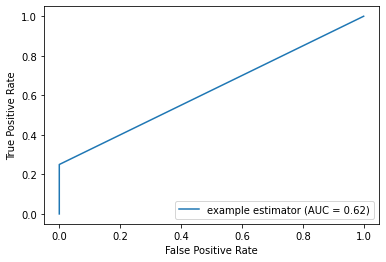

In [37]:
print("Nilai ROC AUC pada data Inference : ", roc_auc_score(y_inf, best_pipe_SVM.predict(X_inf)))

y = np.array(y_inf)
pred = np.array(y_inf_pred)

fpr, tpr, thresholds = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

plt.show()

Statment:

Dari nilai ROC AUC diatas dengan data train maupun test didapatkan nilai 0.687 pada data train dan 0.686 pada data testing, yang dimana apabila dibandingan dengan nilai ROC AUC pada evaluasi model dengan menggunakan data training maka dapat dikatakan bahwa hasil prediksi tersebut adalah **Good Fit**. Hal tersebut ditandai dengan hasil selisih yang tidak terlalu besar diantara kedua pengujian pada Evaluasi model maupun menggunakan data Inferece.

# Pengambilan Kesimpulan

Statment:

Objective kali ini adalah menggunakan kolom *default_payment_next_month* sebagai target pada model. Ada beberapa model yang digunakan pada Milestone 1 kali ini, antara lain:
- Logistic Regression
- SVM Classifier
- Decision Tree
- Random Forest	
- KNN
- Naive Bayes	
- Ada Boost

Berdasarkan EDA yang telah dilakukan sebelumnya, didapati bahwa ada beberapa kolom yang memeiliki nilai korelasi terhadap kolom target tergolong **Sangat Rendah**, dimana nilai korelasi memiliki kaitan erat dengan hasil dari prediksi klasifikasi yang dilakukan terhadap seluruh model yang digunakan pada Milestone 1 ini. `Sehingga diperlukannya proses drop kolom pada kolom-kolom yang memiliki korelasi rendah (Dibawah <0.1) tersebut`.

Setelah dilakukannya Training pada model, `didapatkan bahwa model SVM lah yang memiliki nilai mean terbaik dan nilai Standar Deviasi terkecil. Hal tersebut dapat dibuktikan dari hasil Cross-Validation terhadap model-model klasifikasi yang digunakan pada dataset ini. Dimana model SVM mendapatkan nilai mean terbaik yaitu sebesar 0.69 dan nilai std deviasi 0.0194`, Diikuti dengan model Naive Bayes yang memiliki nilai mean sebesar 0.68 dan nilai std deviasi 0.0165. Berdasarkan table diatas dapat dikatakan bahwa kedua model memiliki nilai akurasi yang tinggi. Sedangkan untuk model yang memiliki nilai terjelek adalah Logistic Regression dan Decison Tree merupakan model dengan nilai terjelek dari tiap model yang telah didefinisikan. Sedangkan model Decison Tree memiliki nilai mean sebesar 0.61, `namun menariknya model ini memiliki std deviasi (persebaran data) terkecil diantara seluruh model yaitu 0.0101`.

Dengan model SVM merupakan model terbaik untuk dataset ini, Selanjutnya merupakan proses Hyperparameter Tuning. Dimana nilai parameter terbaik untuk dataset ini adalah
- C: 1
- Gamma: Scale
- Kernel: RBF

Kemudian untuk hasil prediksi terhadap data inference, model SVM memiliki hasil yang cukup memuaskan. Dimana **SVM** berhasil memprediksi 7 dari 10 data, dengan nilai akurasinya sebesar 70%. Sedangkan untuk nilai ROC AUC, model SVM yang telah dilakukan Hyperparameter Tuning 0.62 yang dimana apabila dibandingkan dengan hasil ROC AUC pada pada data Training maupun Testing model tersebut dapat dikatakan sebagai **Good Fit**.

# Conceptual Problems

Jawab pertanyaan berikut:

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

Jawaban :

1. Criterion adalah sebuah kriteria dari parameter model Decision Tree, dimana Criterion tersebut merupakan parameter dari split yang akan dilakukan oleh model Decision Tree. Contohnya adalah Entropy, dimana criterion ini melakukan keputusan berdasarkan ukuran dari tiap data yang ada. Singkatnya Entropy melakukan perhitungan tiap data yang ada kemudian di lakukan perbandingan dengan data yang ada untuk selanjutnya melakukan klasifikasi.
2. Pruning merupakan sebuah teknik yang digunakan untuk mengkompresi / menghapus beberapa data, yang dimana kompresi tersebut diharapkan untuk mengurangi besaran dari decision / keputusan pada Tree model. 
3. Cara memilih K pada model KNN adalah simplenya dengan cara melihat data yang akan di prediksi. Pemilihan K yaitu dengan mencari nilai jarak terdekat pada tiap data. Namun apabila kita salah dalam memilik K, dapat mengakibatkan Overfit maupun Underfit.
4. Cross Validation merupakan sebuah metode untuk mengevaluasi kinerja dari beberapa model atau algoritma. Sehingga kita dapat mengetahui model apa saja yang cocok dengan data tersebut.
5.  - Accuracy merupakan tingkat nilai sebuah keakurasian / ketepatan sebuah model dalam melakukan klasifikasi ataupun yang lainnya.
    - Precision merupakan sebuah perhitungan yang dimana mencari apakah model tersebut dapat memprediksi data yang terdeteksi True Positive
    - Recall merupakan sebuah perhitungan kebalikan dari Precision, dimana Recall mencari nilai false negative.
    - F1-Score merupakan nilai hasil dari kedua perhitungan Precision dan Recall yang dimana hasil akhirnya merupakan F1-Score.